In [1]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import pandas as pd
from scipy.optimize import curve_fit
from PIL import Image
import matplotlib as mpl

In [2]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.linewidth'] = 1.5

# Funções Auxiliares

In [3]:
def normalize(x):
    maximo = max(x)
    res    = list()
    for i in x:
        res.append(i/maximo)
    return res

def calibrate(x, cor):
    res = list()
    for i in x:
        res.append(cor*i)
    return res

# Calibração

In [4]:
img_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/3a_sesh/calibracao.png'

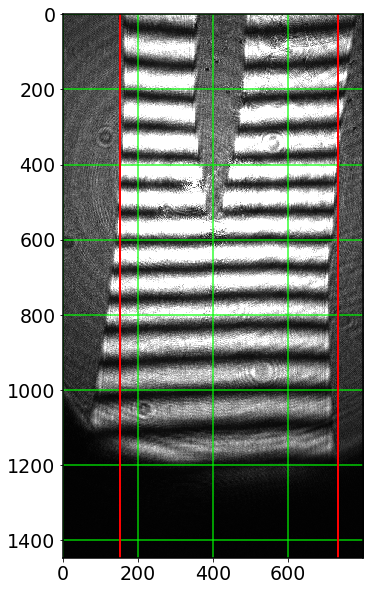

In [5]:
plt.figure(figsize=(10, 10))

img = Image.open(img_path)
rotated = img.rotate(5)

# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = img.size
  
# Setting the points for cropped image
left = 700
top = 0
right = 1500
bottom = height
  
# Cropped image of above dimension
# (It will not change orginal image)


im1 = img.crop((left, top, right, bottom))

plt.grid(10, linewidth=2, color='lime', alpha=0.6)
plt.vlines(152, 0, 1500, color='red', lw=2)
plt.vlines(732, 0, 1500, color='red', lw=2)

plt.imshow(im1, cmap=('gray'))

In [6]:
dist = 8.75e-3
dpix = 732 - 152

h    = 3.69e-6

dist_img=h*dpix
A=dist_img/dist

In [7]:
h_cor=h/A

In [8]:
h_cor

1.5086206896551724e-05

# Determinação da Isofásica

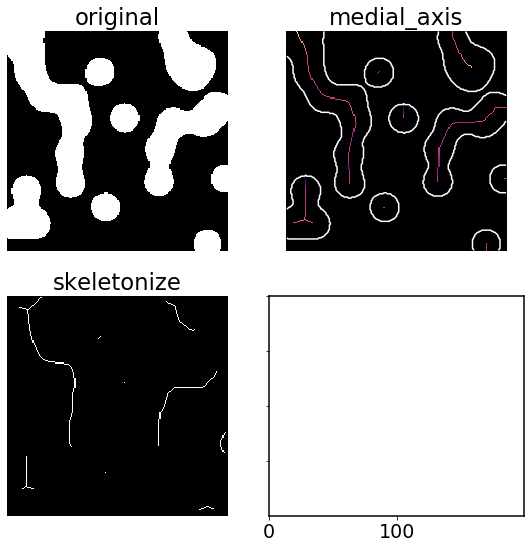

In [9]:
from skimage.morphology import medial_axis, skeletonize

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
#skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

#ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
#ax[3].set_title("skeletonize (Lee 94)")
#ax[3].axis('off')

fig.tight_layout()
plt.show()

In [266]:
"""
 * Python script to demonstrate simple thresholding.
 *
 * usage: python Threshold.py <filename> <sigma> <threshold>
 * Example parameter values: 2 for sigma and .8 for threshold
"""
import sys
import numpy as np
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer

# get filename, sigma, and threshold value from command line
filename = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/3a_sesh/ponta_quenta.png'
sigma    = 1
t        = 1

# read and display the original image
image = skimage.io.imread(fname=filename)
#image = skimage.util.invert(image)


viewer = skimage.viewer.ImageViewer(image)
#viewer.show()


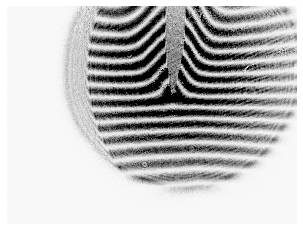

In [11]:
salve = skimage.util.invert(image)
plt.imshow(salve, cmap = 'gray')
plt.axis(False)

plt.imsave('riscas_saquetas.png', salve, cmap='gray')

In [267]:
# blur and grayscale before thresholding
blur = skimage.color.rgb2gray(image)
blur = skimage.filters.gaussian(blur, sigma=10)

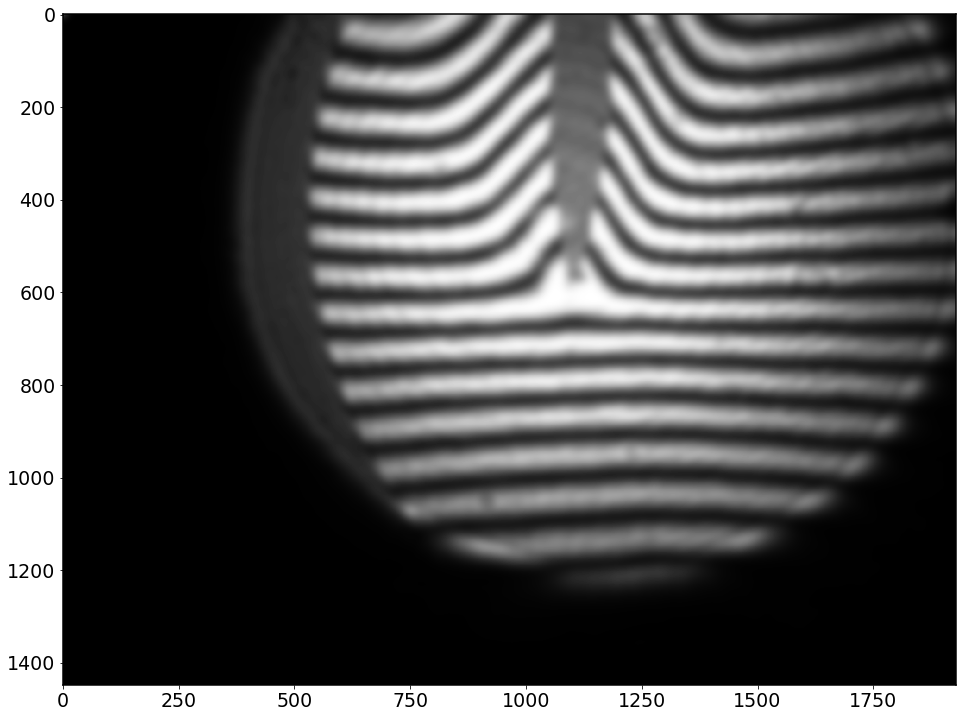

In [268]:
fig=plt.figure(figsize=(16,16))
plt.imshow(blur, cmap='gray')

plt.imsave('riscas_gauss.png', skimage.util.invert(blur), cmap='gray')

In [269]:
# set Threshold
t = 0.45

# perform inverse binary thresholding
mask = blur < t

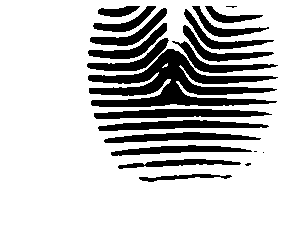

In [270]:


mask = skimage.util.invert(mask)
#mask = skimage.filters.gaussian(mask, sigma=6)

mask = mask < t

plt.axis(False)
plt.imshow(mask, cmap='gray')
#plt.imsave

In [271]:
cropped = mask[0:650,600:1550]

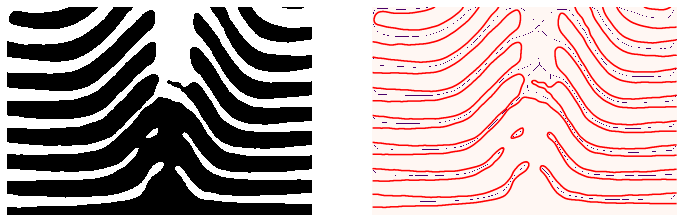

In [272]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

mask = skimage.util.invert(mask)
#mask = skimage.filters.gaussian(mask, sigma=6)

mask = mask < t

ax1.axis(False)
ax2.axis(False)

ax1.imshow(cropped, cmap='gray')

ax2.imshow(dist_on_skel, cmap='magma')
ax2.contour(cropped, [0.5], colors='red', alpha=1)
ax2.imshow(skeleton, cmap='RdPu')

plt.savefig('twins.png')

In [273]:
skeleton = skeletonize(cropped)

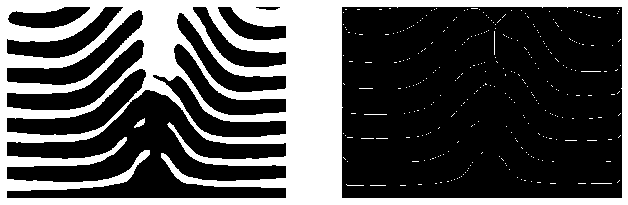

In [286]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

recorte = image[0:650,600:1550]

ax1.imshow(cropped,  cmap='gray')
ax2.imshow(skeleton, cmap='gray')

ax1.axis(False)
ax2.axis(False)

plt.savefig('twins.png')

In [23]:
skel, distance = medial_axis(cropped, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

(-0.5, 949.5, 649.5, -0.5)

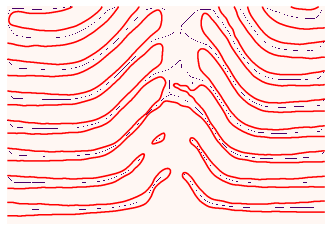

In [24]:
plt.imshow(dist_on_skel, cmap='magma')
plt.contour(cropped, [0.5], colors='red', alpha=1)
plt.imshow(skeleton, cmap='RdPu')
#plt.set_title('medial_axis')
plt.axis('off')

(-0.5, 949.5, 649.5, -0.5)

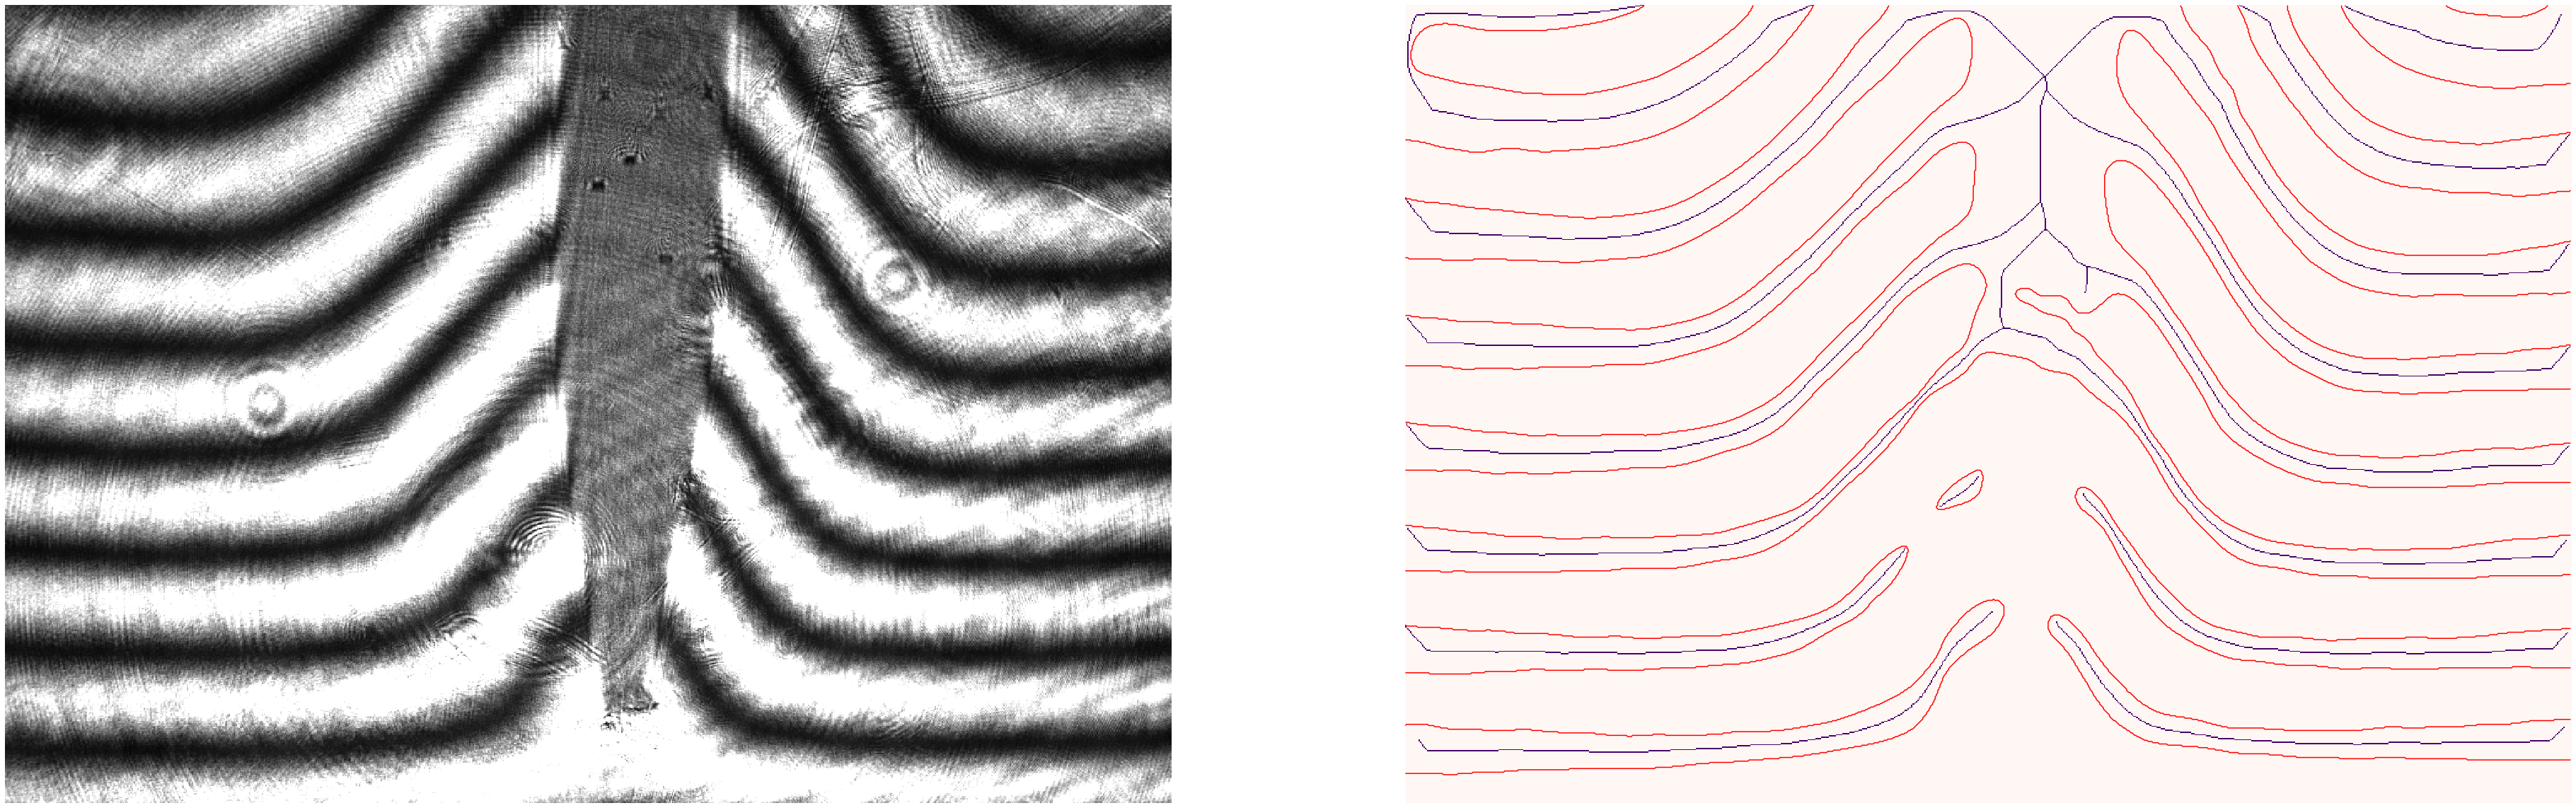

In [25]:
r = 10

fig = plt.figure(figsize=(650/r, 950/r))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

recorte = image[0:650,600:1550]

ax1.imshow(recorte,  cmap='gray')
ax1.axis('off')

ax2.imshow(dist_on_skel, cmap='magma')
ax2.contour(cropped, [0.5], colors='red', alpha=1)
ax2.imshow(skeleton, cmap='RdPu')
ax2.axis('off')
ax2.axis('off')

#plt.savefig('Esqueleto.pdf', bbox='tight')

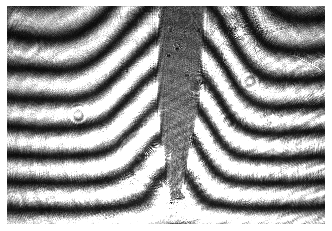

In [26]:
#fig = plt.figure(figsize=(650/r, 950/r))
plt.imshow(recorte,  cmap='gray')
plt.axis('off')

plt.savefig('crop.pdf')

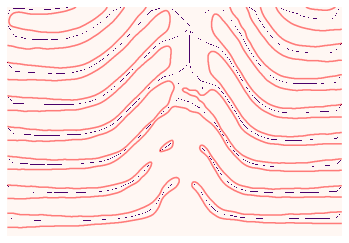

In [27]:
fig=plt.figure(figsize=(6, 6))

plt.imshow(dist_on_skel, cmap='Greys')
plt.contour(cropped, [0.5], colors='red', alpha=0.5)
plt.imshow(skeleton, cmap='RdPu')
plt.axis('off')

plt.savefig('Esqueleto.pdf', bbox='tight')

In [28]:
plt.imsave('skeleton.png', np.array(skeleton), cmap='gray')

# Get Pixel Coordinates

In [29]:
import PIL #The reason I use PIL and not opencv is that I find pillow 
#(which is imported with 'PIL') a very useful library for image editing.

image = PIL.Image.open('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Notebooks Python/skeleton_clean.png') #the image is opened and named image
f = image.load() #I'm not sure what the load() operation exactly does, but it 
# is necesarry.

color = (0, 0, 0, 255) # the Red Green Blue values that you want to find the 
#coordinates of
PixelCoordinates = [] # List in which all pixel coordinates that match 
#requirements will be added.

#The lines of code below check for each pixel in the image if the RGB-values 
# are equal to (235, 187, 7)
for x in range(image.size[0]):
    for y in range(image.size[1]):
        if f[x,y] != color:
            PixelCoordinates.append([x,y])

In [58]:
image.size[0]

950

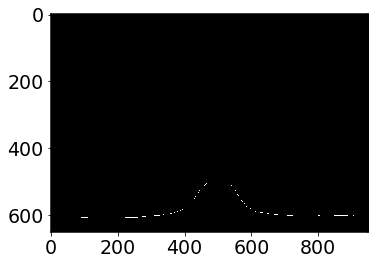

In [59]:
plt.imshow(image)

In [30]:
x = list()
y = list()

maximo = max(PixelCoordinates[1])

for i in PixelCoordinates:
    x.append(i[0])
    y.append(abs(i[1] - maximo))
    

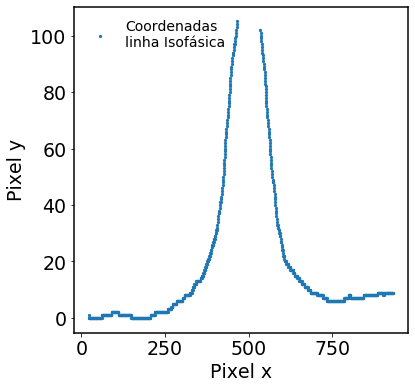

In [31]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(x, y, s=5, label='Coordenadas\nlinha Isofásica')
plt.legend(frameon=False, fontsize=14)

plt.xlabel(r'Pixel x')
plt.ylabel(r'Pixel y')

plt.savefig('isofasica.eps', bbox_inches='tight')

In [62]:
#x = pd.Series(x)
#y = pd.Series(y)

In [63]:
#coords = { 'pixel_x': x, 'pixel_y': y}
#coords = pd.DataFrame(coords)

In [64]:
#coords.to_csv('rita.csv')

In [32]:
fig = plt.figure(figsize=(6, 6))

plt.fill_betweenx(areay, min(x), 240, facecolor ='red', alpha = 0.4)
plt.fill_betweenx(areay, 240, 730, facecolor ='green', alpha  = 0.4)
plt.fill_betweenx(areay, 730, max(x), facecolor ='red', alpha = 0.4)

plt.scatter(x, y, s=5, label='Curva isofásica')
plt.legend(frameon=False, fontsize=14)

plt.xlabel(r'Pixel x')
plt.ylabel(r'Pixel y')

areay = np.linspace(min(y), max(y), 1000)

plt.ylim(-10, 120)

plt.savefig('isofasica_bkg.eps')

NameError: name 'areay' is not defined

<Figure size 432x432 with 0 Axes>

In [33]:
bkg_x = x[:240] + x[730:]
bkg_y = y[:240] + y[730:]

In [34]:
def lin(x, m, b):
    return m*x+b

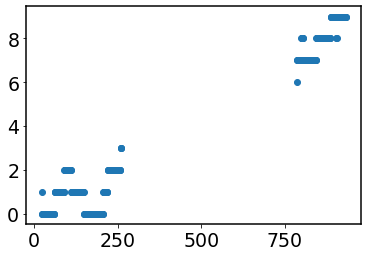

In [35]:
plt.scatter(bkg_x, bkg_y)

In [36]:
popt, pcov = curve_fit(lin, bkg_x, bkg_y)

In [37]:
popt

array([ 0.00976958, -0.48473753])

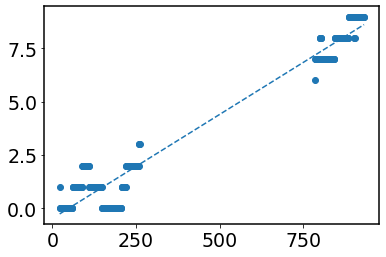

In [38]:
plt.scatter(bkg_x, bkg_y)

u = np.linspace(bkg_x[0], bkg_x[-1], 1000)
plt.plot(u, lin(u, popt[0], popt[1]), linestyle='--')

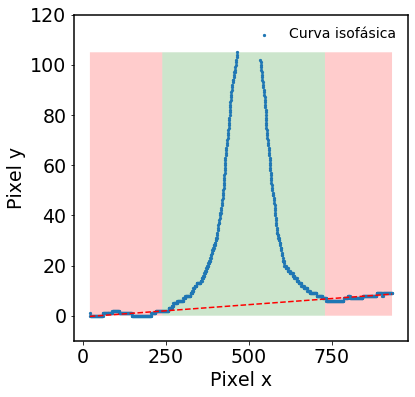

In [39]:
fig = plt.figure(figsize=(6, 6))

plt.xlabel(r'Pixel x')
plt.ylabel(r'Pixel y')

areay = np.linspace(min(y), max(y), 1000)

plt.fill_betweenx(areay, min(x), 240, facecolor ='red', alpha = 0.2)
plt.fill_betweenx(areay, 240, 730, facecolor ='green',  alpha = 0.2)
plt.fill_betweenx(areay, 730, max(x), facecolor ='red', alpha = 0.2)

u = np.linspace(bkg_x[0], bkg_x[-1], 1000)
plt.plot(u, lin(u, popt[0], popt[1]), linestyle='--', color='red', label='')

plt.scatter(x, y, s=5, label='Curva isofásica')
plt.legend(frameon=False, fontsize=14)

plt.ylim(-10, 120)

plt.savefig('isofasica_bkg.pdf', bbox_inches='tight')

In [40]:
y_corr = list()
for i in range(len(y)):
    y_corr.append(y[i] - lin(x[i], popt[0], popt[1]))

Text(0, 0.5, 'Pixel y')

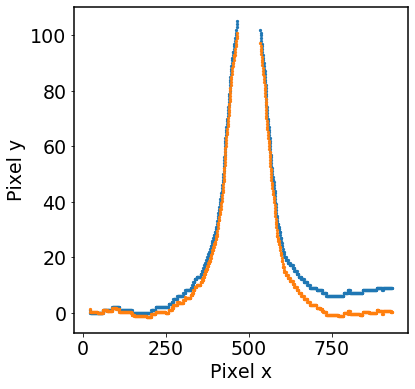

In [41]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(x, y, s=5, label='Coordenadas\nlinha Isofásica')
plt.scatter(x, y_corr, s=5, label='Coordenadas\nlinha Isofásica/ncorrigida')
#plt.legend(frameon=False, fontsize=14)

plt.xlabel(r'Pixel x')
plt.ylabel(r'Pixel y')

#plt.savefig('isofasica.eps')

A distância entre duas linhas isofásicas é de 84px

In [42]:
ISO = 84 # 2PI

In [43]:
def gauss(x, A, b, x0, offset):
    return A*np.exp(-((x-x0)/b)**2) + offset

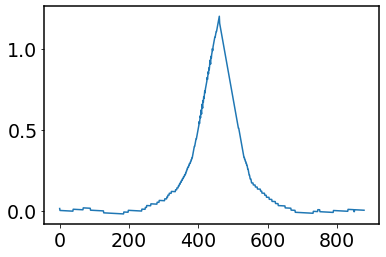

In [44]:
plt.plot(np.array(y_corr)/84)

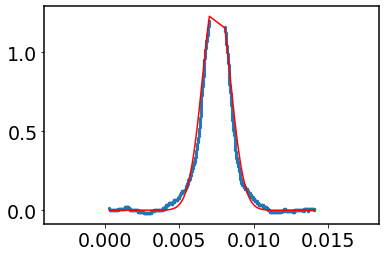

In [45]:
plt.scatter(calibrate(x, h_cor), np.array(y_corr)/84, s=5, label='Coordenadas\nlinha Isofásica/ncorrigida')
plt.plot(calibrate(x, h_cor), gauss(np.array(calibrate(x, h_cor)), 1.4, 0.0013, 0.0075, 0), color='red')

In [46]:
popt, pcov = curve_fit(gauss, np.array(calibrate(x, h_cor)), np.array(y_corr)/84, p0=[1.2, 0.0013, 0.0075, 0], maxfev=2000)

In [47]:
print('A = ' + str(round(popt[0], 6)) + ' +/- '       + str(pcov[0][0]) + '\n' +
'b = ' +       str(round(popt[1], 6)) + ' +/- '       + str(pcov[1][1]) + '\n' +
'x0 = ' +      str(round(popt[2], 6)) + ' +/- '       + str(pcov[2][3]) + '\n'+
'offset = ' +  str(round(popt[3], 6)) + ' +/- '       + str(pcov[3][3]))

A = 1.412298 +/- 5.694502187999338e-05
b = 0.001176 +/- 2.4987003259753564e-11
x0 = 0.007488 +/- 3.0282240650382775e-11
offset = 0.013467 +/- 1.3742954453190405e-06


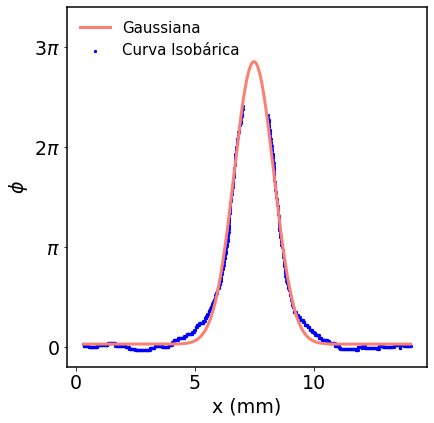

In [48]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

x_cor = calibrate(x, h_cor)

u = np.linspace(x_cor[0], x_cor[-1], 1000)

#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(calibrate(x_cor, 1e3), np.array(y_corr)/84, s=5, color='blue', label='Curva Isobárica')

ax.plot(calibrate(u, 1e3), gauss(u, popt[0], popt[1], popt[2], popt[3]), color='salmon', lw=3, label='Gaussiana')
ax.set_yticklabels([0, 0, r'$\pi$', r'2$\pi$', r'3$\pi$'])


plt.xlabel('x (mm)')
plt.ylabel(r'$\phi$')
plt.ylim(-0.1, 1.7)

plt.legend(fontsize=15, frameon=False)

plt.savefig('gauss_fit.eps', bbox_inches='tight')

In [49]:
def gauss(x, A, b, x0, offset):
    return A*(4*np.pi*np.sqrt(np.pi)*b/(632.8e-9))*np.exp(-((x-x0)/b)**2) + offset

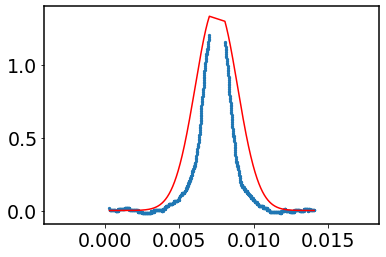

In [50]:
plt.scatter(calibrate(x, h_cor), np.array(y_corr)/84, s=5, label='Coordenadas\nlinha Isofásica/ncorrigida')
plt.plot(calibrate(x, h_cor), gauss(np.array(calibrate(x, h_cor)), 20e-6, 2e-3, 0.0075, 0), color='red')

In [51]:
popt, pcov = curve_fit(gauss, np.array(calibrate(x, h_cor)), np.array(y_corr)/84, p0=[20e-6, 2e-3, 0.0075, 0], maxfev=2000)

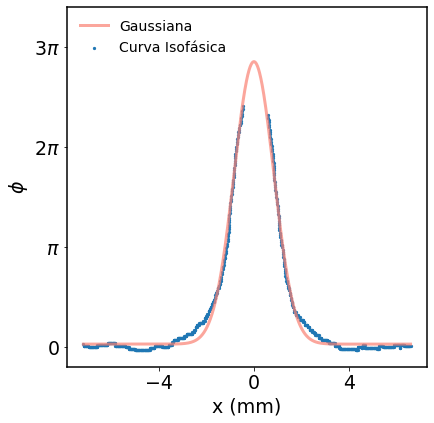

In [75]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

x_cor = calibrate(x, h_cor)

u = np.linspace(x_cor[0], x_cor[-1], 1000)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(calibrate(x_cor - popt[2], 1e3), np.array(y_corr)/84, s=5, label='Curva Isofásica')

ax.plot(calibrate(u - popt[2], 1e3), gauss(u, popt[0], popt[1], popt[2], popt[3]), color='salmon', lw=3, label='Gaussiana', alpha=0.7)
ax.set_yticklabels([0, 0, r'$\pi$', r'2$\pi$', r'3$\pi$'])


plt.xlabel('x (mm)')
plt.ylabel(r'$\phi$')
plt.ylim(-0.1, 1.7)

plt.legend(fontsize=14, frameon=False, loc='upper left')

#ax.scatter(calibrate(x_cor - popt[2], 1e3)[460], (np.array(y_corr)/84)[460], s=200, color='r', marker='x')
#ax.scatter(calibrate(x_cor - popt[2], 1e3)[461], (np.array(y_corr)/84)[461], s=200, color='r', marker='x')

plt.savefig('gauss_fit_sem_cruz.pdf', bbox_inches='tight')

In [71]:
print('A = ' + str(round(popt[0]*2*np.pi, 100)) + ' +/- '       + str(np.sqrt(pcov[0][0])) + '\n' +
        'b = ' +       str(round(popt[1], 70)) + ' +/- '       + str(np.sqrt(pcov[1][1])) + '\n' +
        'x0 = ' +      str(round(popt[2], 70)) + ' +/- '       + str(np.sqrt(pcov[2][3])) + '\n'+
        'offset = ' +  str(round(popt[3], 70)) + ' +/- '       + str(np.sqrt(pcov[3][3])))

A = 0.0002144357410927361 +/- 3.094622920377556e-07
b = 0.001175685432624628 +/- 4.9986701798797644e-06
x0 = 0.007487952571186192 +/- 5.502876071574421e-06
offset = 0.013466859553477874 +/- 0.0011723020527219313


In [170]:
def get_maximos(w):
    maximos=[w[0], w[1]]
    check = 0
    for i in w:
        if i > maximos[0]:
            maximos[0] = i
            check = 1
        if (i > maximos[1]) and check==0:
            maximos[1] = i;
        check = 0
    return maximos

In [193]:
y_corr.index(get_maximos(y_corr)[1])

461

In [74]:
(np.array(x_cor))[461] - popt[2]

0.0005831681184689796

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

x_cor = calibrate(x, h_cor)
#PARA CENTRAR A GAUSSIANA A PEDIDO DO MIGUEZ
new_x = x_cor

for i in x_cor:
    new_x.append(i - popt[1])

u = np.linspace(new_x[0], new_x[-1], 1000)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(calibrate(new_x, 1e3), np.array(y_corr)/84, s=5, label='Curva Isobárica')

ax.plot(calibrate(u, 1e3), gauss(u, popt[0], popt[1], popt[2], popt[3]), color='salmon', lw=3, label='Gaussiana', alpha=0.7)
ax.set_yticklabels([0, 0, r'$\pi$', r'2$\pi$', r'3$\pi$'])


plt.xlabel('x (mm)')
plt.ylabel(r'$\phi$')
plt.ylim(-0.1, 1.7)

plt.legend(fontsize=14, frameon=False, loc='upper left')

ax.scatter(calibrate(new_x, 1e3)[460], (np.array(y_corr)/84)[460], s=200, color='r', marker='x')
ax.scatter(calibrate(new_x, 1e3)[461], (np.array(y_corr)/84)[461], s=200, color='r', marker='x')

plt.savefig('gauss_fit.png', bbox_inches='tight')

In [57]:
u[list(gauss(u, popt[0], popt[1], popt[2], popt[3])).index(max(gauss(u, popt[0], popt[1], popt[2], popt[3])))]

0.0074915777846812324

In [63]:
gauss((np.array(x_cor))[461], popt[0], popt[1], popt[2], popt[3])

1.1177312488871909

In [152]:
l0 = 632.8e-9

def rect(x, A, R, x0, offset):
    return offset + A*4*np.pi*R*(np.sqrt(1 - ((x-x0)/R)**2))/(l0)

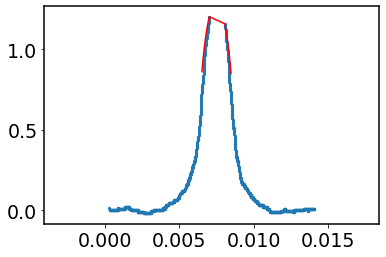

In [256]:
sq_x = x[420:500]

plt.scatter(calibrate(x, h_cor), np.array(y_corr)/84, s=5, label='Coordenadas\nlinha Isofásica/ncorrigida')
plt.plot(calibrate(sq_x, h_cor), rect(np.array(calibrate(sq_x, h_cor)), 5e-5, 0.0013, 0.0075, 0), color='red')

In [257]:
popt, pcov = curve_fit(rect, np.array(calibrate(sq_x, h_cor)), np.array(y_corr[420:500])/84, p0=[5e-5, 0.0013, 0.0075, 0], maxfev=2000)

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


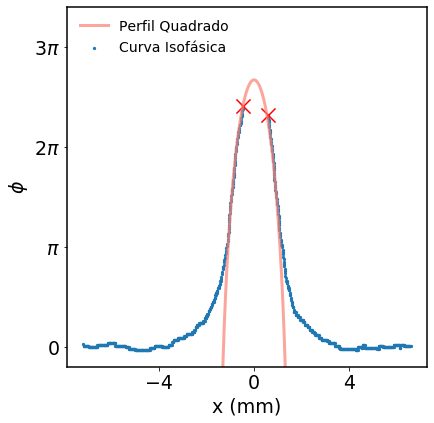

In [258]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

x_cor = calibrate(x, h_cor)

u = np.linspace(x_cor[0], x_cor[-1], 1000)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(calibrate(x_cor - popt[2], 1e3), np.array(y_corr)/84, s=5, label='Curva Isofásica')

ax.plot(calibrate(u - popt[2], 1e3), rect(u, popt[0], popt[1], popt[2], popt[3]), color='salmon', lw=3, label='Perfil Quadrado', alpha=0.7)
ax.set_yticklabels([0, 0, r'$\pi$', r'2$\pi$', r'3$\pi$'])


plt.xlabel('x (mm)')
plt.ylabel(r'$\phi$')
plt.ylim(-0.1, 1.7)

plt.legend(fontsize=14, frameon=False, loc='upper left')

ax.scatter(calibrate(x_cor - popt[2], 1e3)[460], (np.array(y_corr)/84)[460], s=200, color='r', marker='x')
ax.scatter(calibrate(x_cor - popt[2], 1e3)[461], (np.array(y_corr)/84)[461], s=200, color='r', marker='x')

plt.savefig('quadrado_fit.pdf', bbox_inches='tight')

In [259]:
print('A = ' + str(round(popt[0], 20)) + ' +/- '       + str(np.sqrt(pcov[0][0])) + '\n' +
'R = ' +       str(round(popt[1], 20)) + ' +/- '       + str(np.sqrt(pcov[1][1])) + '\n' +
'x0 = ' +      str(round(popt[2], 20)) + ' +/- '       + str(np.sqrt(pcov[2][3])) + '\n'+
'offset = ' +  str(round(popt[3], 20)) + ' +/- '       + str(np.sqrt(pcov[3][3])))

A = 8.240240950814438e-05 +/- 1.5038327467724238e-05
R = 0.001415857156407046 +/- 0.00017830298512176316
x0 = 0.007492528320917976 +/- 0.00014164368384721936
offset = -0.9822544799134746 +/- 0.7037549155210234


In [260]:
l0 = 632.8e-9

def tri(x, A, R, x0, offset):
    return offset + A*2*np.pi*R*(np.sqrt(1 - ((x-x0)/R)**2) - np.arcsinh(np.sqrt(((R/(x-x0))**2) - 1))*((x-x0)/R)**2)/(l0)

def tri(x, A, R, x0):
    return A*2*np.pi*R*(np.sqrt(1 - ((x-x0)/R)**2) - np.arcsinh(np.sqrt(((R/(x-x0))**2) - 1))*((x-x0)/R)**2)/(l0)

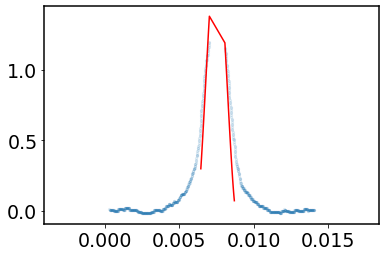

In [261]:
sq_x = x[410:520]

plt.scatter(calibrate(x, h_cor), np.array(y_corr)/84, s=5, label='Coordenadas\nlinha Isofásica/ncorrigida', alpha=0.1)
plt.plot(calibrate(sq_x, h_cor), tri(np.array(calibrate(sq_x, h_cor)), 1.5e-4, 0.0013, 0.0075), color='red')

In [262]:
popt, pcov = curve_fit(tri, np.array(calibrate(sq_x, h_cor)), np.array(y_corr[410:520])/84, p0=[5e-5, 0.0013, 0.0075], maxfev=1000000)

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


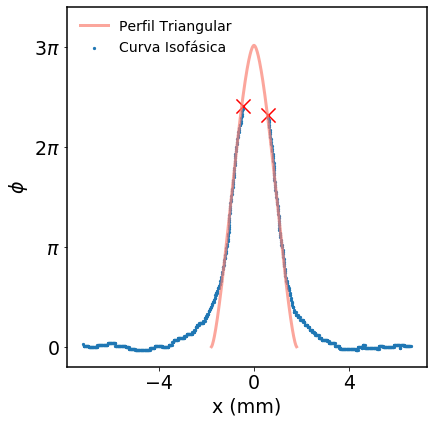

In [263]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

x_cor = calibrate(x, h_cor)

u = np.linspace(x_cor[0], x_cor[-1], 1000)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(calibrate(x_cor - popt[2], 1e3), np.array(y_corr)/84, s=5, label='Curva Isofásica')

ax.plot(calibrate(u - popt[2], 1e3), tri(u, popt[0], popt[1], popt[2]), color='salmon', lw=3, label='Perfil Triangular', alpha=0.7)
ax.set_yticklabels([0, 0, r'$\pi$', r'2$\pi$', r'3$\pi$'])


plt.xlabel('x (mm)')
plt.ylabel(r'$\phi$')
plt.ylim(-0.1, 1.7)

plt.legend(fontsize=14, frameon=False, loc='upper left')

ax.scatter(calibrate(x_cor - popt[2], 1e3)[460], (np.array(y_corr)/84)[460], s=200, color='r', marker='x')
ax.scatter(calibrate(x_cor - popt[2], 1e3)[461], (np.array(y_corr)/84)[461], s=200, color='r', marker='x')

plt.savefig('tri_fit.pdf', bbox_inches='tight')

In [264]:
print('A = ' + str(round(2*np.pi*popt[0], 20)) + ' +/- '       + str(np.sqrt(pcov[0][0])) + '\n' +
'R = ' +       str(round(popt[1], 20)) + ' +/- '       + str(np.sqrt(pcov[1][1])) + '\n' +
'x0 = ' +      str(round(popt[2], 20)) + ' +/- '       + str(np.sqrt(pcov[2][2])))

A = 0.0005328087379602764 +/- 8.964650736974488e-07
R = 0.0017901785524765885 +/- 9.479005894528564e-06
x0 = 0.007491552194517883 +/- 2.066392804971515e-06
